In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
dataset = pd.read_parquet('dataset/yellow_tripdata_2025-01.parquet')
zone_lookup = pd.read_csv('dataset/taxi_zone_lookup.csv')


In [4]:
dataset.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
0,1,2025-01-01 00:18:38,2025-01-01 00:26:59,1.0,1.60,1.0,N,229,237,1,10.0,3.5,0.5,3.00,0.0,1.0,18.00,2.5,0.0,0.0
1,1,2025-01-01 00:32:40,2025-01-01 00:35:13,1.0,0.50,1.0,N,236,237,1,5.1,3.5,0.5,2.02,0.0,1.0,12.12,2.5,0.0,0.0
2,1,2025-01-01 00:44:04,2025-01-01 00:46:01,1.0,0.60,1.0,N,141,141,1,5.1,3.5,0.5,2.00,0.0,1.0,12.10,2.5,0.0,0.0
3,2,2025-01-01 00:14:27,2025-01-01 00:20:01,3.0,0.52,1.0,N,244,244,2,7.2,1.0,0.5,0.00,0.0,1.0,9.70,0.0,0.0,0.0
4,2,2025-01-01 00:21:34,2025-01-01 00:25:06,3.0,0.66,1.0,N,244,116,2,5.8,1.0,0.5,0.00,0.0,1.0,8.30,0.0,0.0,0.0


In [5]:
dataset.shape

(3475226, 20)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3475226 entries, 0 to 3475225
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

In [7]:
dataset.describe(include='all')

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
count,3.475226e+06,3475226,3475226,2.935077e+06,3.475226e+06,2.935077e+06,2935077,3.475226e+06,3.475226e+06,3.475226e+06,3.475226e+06,3.475226e+06,3.475226e+06,3.475226e+06,3.475226e+06,3.475226e+06,3.475226e+06,2.935077e+06,2.935077e+06,3.475226e+06
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,2927431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.785428e+00,2025-01-17 11:02:55.910964,2025-01-17 11:17:56.997901,1.297859e+00,5.855126e+00,2.482535e+00,NaN,1.651916e+02,1.641252e+02,1.036623e+00,1.708180e+01,1.317737e+00,4.780991e-01,2.959813e+00,4.493081e-01,9.547946e-01,2.561129e+01,2.225237e+00,1.239111e-01,4.834093e-01
min,1.000000e+00,2024-12-31 20:47:55,2024-12-18 07:52:40,0.000000e+00,0.000000e+00,1.000000e+00,NaN,1.000000e+00,1.000000e+00,0.000000e+00,-9.000000e+02,-7.500000e+00,-5.000000e-01,-8.600000e+01,-1.269400e+02,-1.000000e+00,-9.010000e+02,-2.500000e+00,-1.750000e+00,-7.500000e-01
25%,2.000000e+00,2025-01-10 07:59:01,2025-01-10 08:15:29.500000,1.000000e+00,9.800000e-01,1.000000e+00,NaN,1.320000e+02,1.130000e+02,1.000000e+00,8.600000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.520000e+01,2.500000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+00,2025-01-17 15:41:33,2025-01-17 15:59:34,1.000000e+00,1.670000e+00,1.000000e+00,NaN,1.620000e+02,1.620000e+02,1.000000e+00,1.211000e+01,0.000000e+00,5.000000e-01,2.450000e+00,0.000000e+00,1.000000e+00,1.995000e+01,2.500000e+00,0.000000e+00,7.500000e-01
75%,2.000000e+00,2025-01-24 19:34:06,2025-01-24 19:48:31,1.000000e+00,3.100000e+00,1.000000e+00,NaN,2.340000e+02,2.340000e+02,1.000000e+00,1.950000e+01,2.500000e+00,5.000000e-01,3.930000e+00,0.000000e+00,1.000000e+00,2.778000e+01,2.500000e+00,0.000000e+00,7.500000e-01
max,7.000000e+00,2025-02-01 00:00:44,2025-02-01 23:44:11,9.000000e+00,2.764236e+05,9.900000e+01,NaN,2.650000e+02,2.650000e+02,5.000000e+00,8.633721e+05,1.500000e+01,1.050000e+01,4.000000e+02,1.709400e+02,1.000000e+00,8.633804e+05,2.500000e+00,6.750000e+00,7.500000e-01


In [9]:
#check des valeurs manquantes
dataset.isna().sum().sort_values(ascending=False)

Airport_fee              540149
passenger_count          540149
congestion_surcharge     540149
RatecodeID               540149
store_and_fwd_flag       540149
VendorID                      0
mta_tax                       0
total_amount                  0
improvement_surcharge         0
tolls_amount                  0
tip_amount                    0
fare_amount                   0
extra                         0
tpep_pickup_datetime          0
payment_type                  0
DOLocationID                  0
PULocationID                  0
trip_distance                 0
tpep_dropoff_datetime         0
cbd_congestion_fee            0
dtype: int64

In [10]:
# durée des trajets en minutes
dataset['trip_duration_minute'] = (dataset['tpep_dropoff_datetime'] - dataset['tpep_pickup_datetime']).dt.total_seconds() / 60


In [11]:
# heures et jours utiles
dataset['pickup_hour'] = dataset['tpep_pickup_datetime'].dt.hour
dataset['pickup_dayofweek'] = dataset['tpep_pickup_datetime'].dt.dayofweek 
dataset['pickup_date'] = dataset['tpep_pickup_datetime'].dt.date

In [12]:
# suppression des trajets invalides ou aberrants
dataset_clean = dataset[
    (dataset['trip_distance'] > 0) &
    (dataset['trip_duration_minute'] > 0) &
    (dataset['trip_duration_minute'] < 180) & 
    (dataset['trip_distance'] < 100) &  
    (dataset['passenger_count'] > 0) &
    (dataset['fare_amount'] > 0)
].copy()

dataset_clean.dropna(inplace=True)

In [13]:
dataset_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2814269 entries, 0 to 2935076
Data columns (total 24 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee            floa

In [14]:
dataset_clean.sample(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee,trip_duration_minute,pickup_hour,pickup_dayofweek,pickup_date
630920,1,2025-01-08 15:43:29,2025-01-08 16:00:59,1.0,3.20,1.0,N,246,144,1,...,0.0,1.0,28.60,2.5,0.00,0.75,17.500000,15,2,2025-01-08
1815204,2,2025-01-20 19:06:31,2025-01-20 19:43:47,1.0,16.41,1.0,N,132,256,2,...,0.0,1.0,67.15,0.0,1.75,0.00,37.266667,19,0,2025-01-20
1108088,2,2025-01-13 14:35:04,2025-01-13 14:44:13,1.0,1.69,1.0,N,238,142,1,...,0.0,1.0,20.02,2.5,0.00,0.00,9.150000,14,0,2025-01-13
2071603,2,2025-01-23 14:12:39,2025-01-23 14:19:59,1.0,0.87,1.0,N,237,161,1,...,0.0,1.0,16.69,2.5,0.00,0.75,7.333333,14,3,2025-01-23
1019632,1,2025-01-12 12:51:55,2025-01-12 12:57:15,1.0,0.50,1.0,N,162,230,1,...,0.0,1.0,13.50,2.5,0.00,0.75,5.333333,12,6,2025-01-12


In [15]:
dataset_clean.shape

(2814269, 24)

**#EXPLORATION DES DONNÉES**

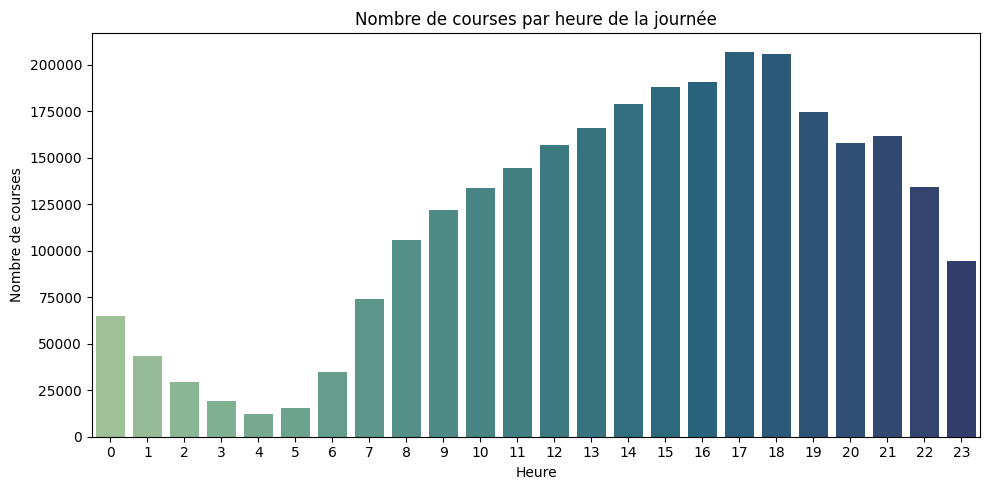

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(x='pickup_hour', data=dataset_clean, palette='crest')
plt.title('Nombre de courses par heure de la journée')
plt.xlabel('Heure')
plt.ylabel('Nombre de courses')
plt.xticks(range(24))
plt.tight_layout()
plt.show()

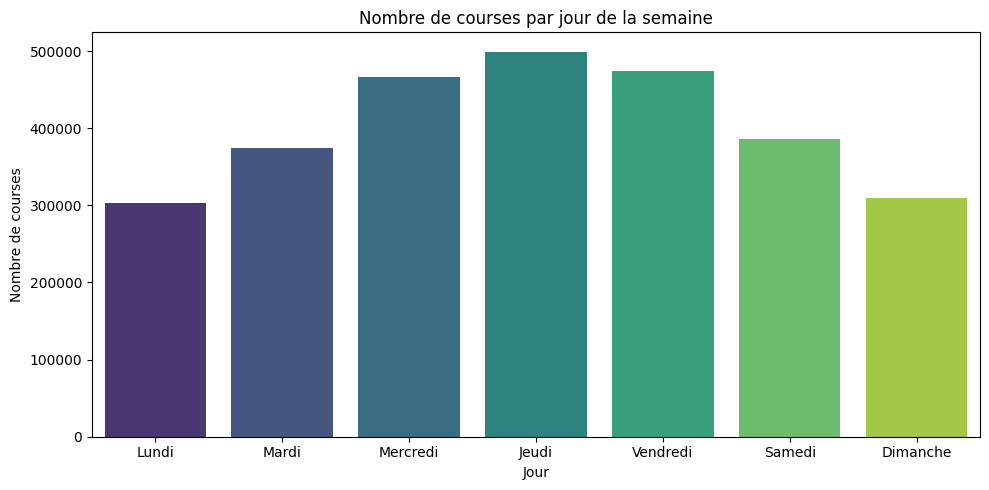

In [17]:
days = ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche']

plt.figure(figsize=(10,5))
sns.countplot(x='pickup_dayofweek', data=dataset_clean, palette='viridis')
plt.title('Nombre de courses par jour de la semaine')
plt.xlabel('Jour')
plt.ylabel('Nombre de courses')
plt.xticks(ticks=range(7), labels=days)
plt.tight_layout()
plt.show()

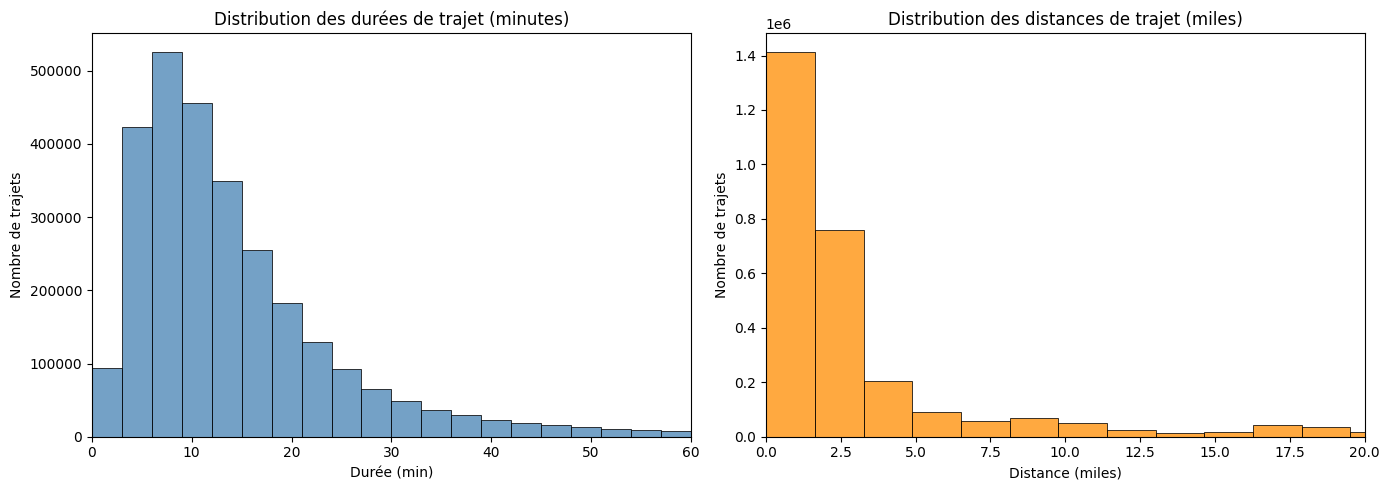

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(14,5))

# Durée
sns.histplot(dataset_clean['trip_duration_minute'], bins=60, kde=False, ax=axes[0], color='steelblue')
axes[0].set_title('Distribution des durées de trajet (minutes)')
axes[0].set_xlabel('Durée (min)')
axes[0].set_ylabel('Nombre de trajets')
axes[0].set_xlim(0, 60)

# Distance
sns.histplot(dataset_clean['trip_distance'], bins=60, kde=False, ax=axes[1], color='darkorange')
axes[1].set_title('Distribution des distances de trajet (miles)')
axes[1].set_xlabel('Distance (miles)')
axes[1].set_ylabel('Nombre de trajets')
axes[1].set_xlim(0, 20)

plt.tight_layout()
plt.show()


***🔍 Résumé des premières observations***


**🕔 1. Heure de la journée :**

Pic de demande entre 17h et 19h → typique du rush hour du soir (retour du travail, fin de bureaux, déplacements personnels).

**Implication** : 🟡 NYC Taxi Services doit renforcer sa flotte en fin de journée, surtout dans les zones de forte activité.


**📆 2. Jours de la semaine :**


Activité plus intense du mercredi au vendredi.


Lundi et dimanche moins chargés → probablement moins de déplacements professionnels.


**Implication** : 📅 Ajuster la flotte hebdomadaire : plus de chauffeurs en fin de semaine ?


**🚕 3. Durée moyenne des trajets :**


Entre 7 et 12 minutes → trajets courts → mobilité intra-urbaine dense.


**Implication** : optimisation possible du turnover des taxis = plus de courses/h → meilleure rentabilité.


**📏 4. Distance moyenne des trajets :**


Majoritairement entre 0 et 2 miles → encore un signe d’hyper-localité des déplacements.


**Implication** : Peut poser la question de l’impact des embouteillages sur la rentabilité.

**# Analyse des questions métiers de l'entreprise**

In [19]:
top_pu = dataset_clean['PULocationID'].value_counts().head(10)
print(top_pu)

PULocationID
237    147950
161    146679
236    137770
132    133586
186    108135
230    107479
162    105016
142     97517
138     85325
163     84611
Name: count, dtype: int64


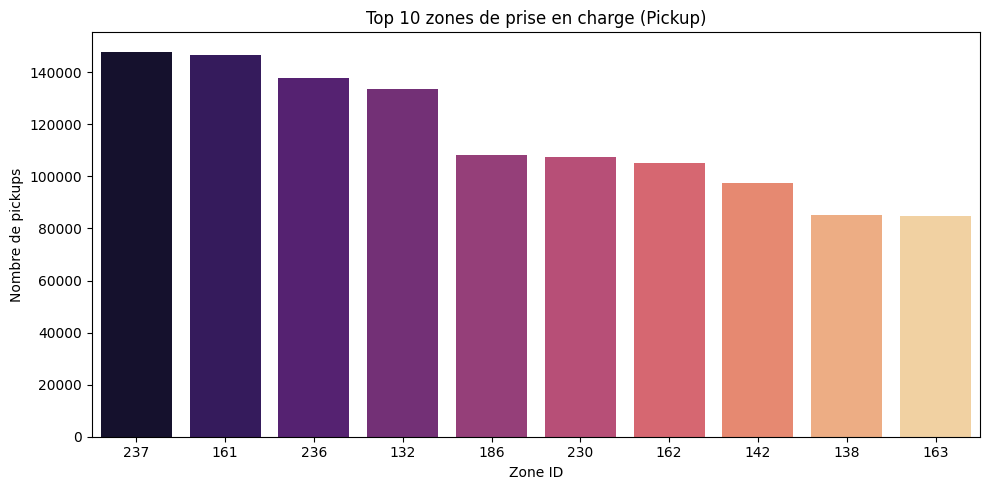

In [20]:
plt.figure(figsize=(10,5))
sns.barplot(x=top_pu.index.astype(str), y=top_pu.values, palette='magma')
plt.title('Top 10 zones de prise en charge (Pickup)')
plt.xlabel('Zone ID')
plt.ylabel('Nombre de pickups')
plt.tight_layout()
plt.show()


In [21]:
zone_lookup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LocationID    265 non-null    int64 
 1   Borough       264 non-null    object
 2   Zone          264 non-null    object
 3   service_zone  263 non-null    object
dtypes: int64(1), object(3)
memory usage: 8.4+ KB


In [22]:
# ajout des noms des zones

# Merge pickup
dataset_geo = dataset_clean.merge(zone_lookup, left_on='PULocationID', right_on='LocationID', how='left')
dataset_geo = dataset_geo.rename(columns={'Borough': 'pickup_borough', 'Zone': 'pickup_zone', 'serviceZone': 'pickup_service_zone'})
dataset_geo = dataset_geo.drop('LocationID', axis=1)

# Merge dropoff
dataset_geo = dataset_geo.merge(zone_lookup, left_on='DOLocationID', right_on='LocationID', how='left')
dataset_geo = dataset_geo.rename(columns={'Borough': 'dropoff_borough', 'Zone': 'dropoff_zone', 'serviceZone': 'dropoff_service_zone'})
dataset_geo = dataset_geo.drop('LocationID', axis=1)


In [23]:
# check des top zones de prise en charges
top_pickup_zones = dataset_geo['pickup_zone'].value_counts().head(10)
print(top_pickup_zones)


pickup_zone
Upper East Side South           147950
Midtown Center                  146679
Upper East Side North           137770
JFK Airport                     133586
Penn Station/Madison Sq West    108135
Times Sq/Theatre District       107479
Midtown East                    105016
Lincoln Square East              97517
LaGuardia Airport                85325
Midtown North                    84611
Name: count, dtype: int64


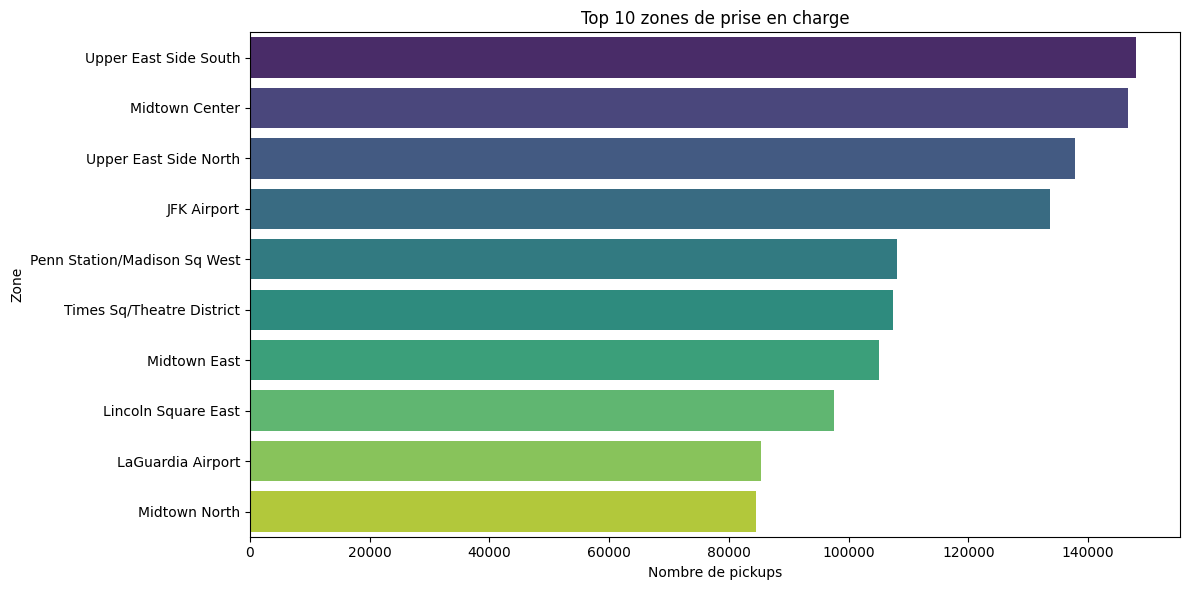

In [24]:
plt.figure(figsize=(12,6))
sns.barplot(x=top_pickup_zones.values, y=top_pickup_zones.index, palette='viridis')
plt.title('Top 10 zones de prise en charge')
plt.xlabel('Nombre de pickups')
plt.ylabel('Zone')
plt.tight_layout()
plt.show()


dropoff_zone
Upper East Side North        144428
Upper East Side South        133518
Midtown Center               111852
Times Sq/Theatre District     89050
Lincoln Square East           85308
Upper West Side South         84920
Murray Hill                   82621
Lenox Hill West               80290
Midtown East                  79566
Midtown North                 72747
Name: count, dtype: int64


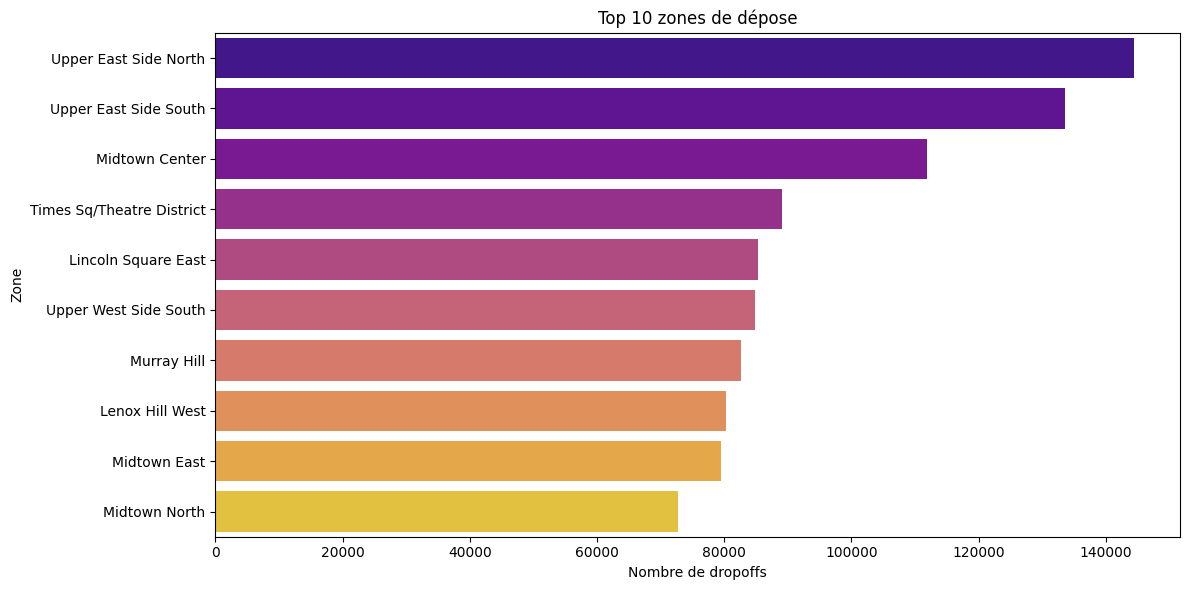

In [25]:
# check des top zones de dépose

top_dropoff_zones = dataset_geo['dropoff_zone'].value_counts().head(10)
print(top_dropoff_zones)

plt.figure(figsize=(12,6))
sns.barplot(x=top_dropoff_zones.values, y=top_dropoff_zones.index, palette='plasma')
plt.title('Top 10 zones de dépose')
plt.xlabel('Nombre de dropoffs')
plt.ylabel('Zone')
plt.tight_layout()
plt.show()


***🧠 Interprétation métier provisoire***


**NYC Taxi Services** doit concentrer sa flotte dans les zones Midtown et Upper East Side, surtout en fin de journée.

**Les hubs de transport** (JFK, Penn Station) génèrent un très grand nombre de pickups → nécessité de prévoir du volume sur place.

**Dépose** = zones résidentielles / touristiques haut de gamme → potentiellement rentable, surtout avec des trajets courts.

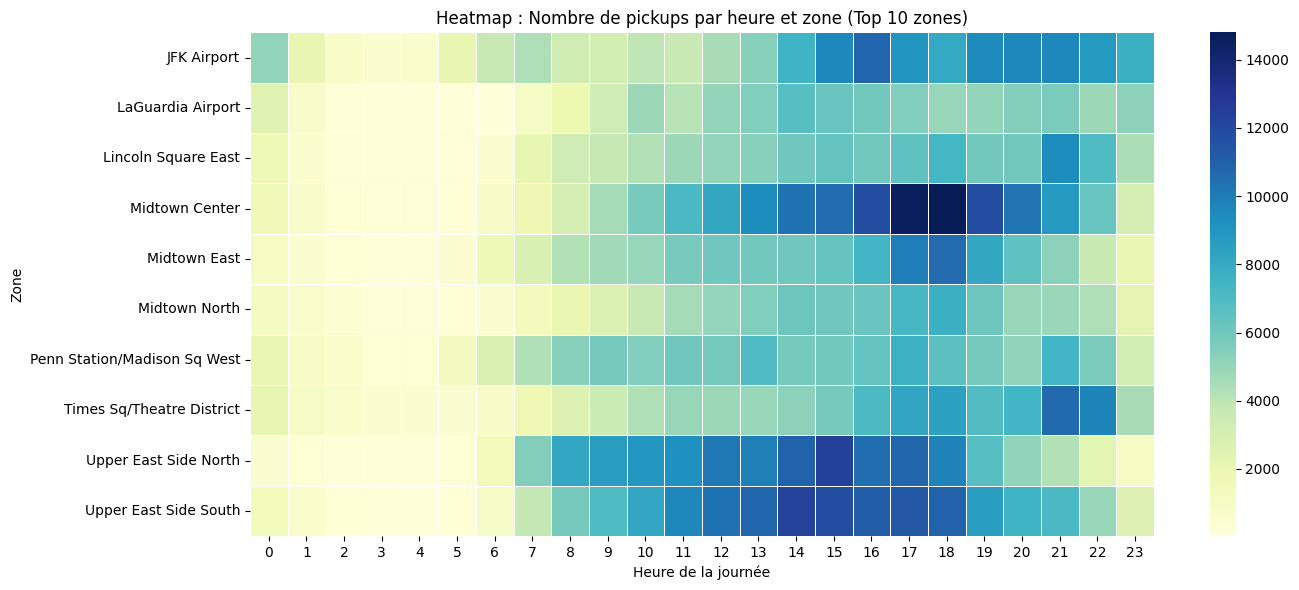

In [26]:
# sélection des zones les plus actives (Top 10 pickups)
top_zones = dataset_geo['pickup_zone'].value_counts().head(10).index

# filtrer sur les top zones
df_top_zones = dataset_geo[dataset_geo['pickup_zone'].isin(top_zones)]

# création du pivot (pickup_zone × pickup_hour)
pivot_zone_hour = df_top_zones.pivot_table(index='pickup_zone', columns='pickup_hour', values='VendorID', aggfunc='count')

# affichage du heatmap
plt.figure(figsize=(14,6))
sns.heatmap(pivot_zone_hour, cmap='YlGnBu', annot=False, linewidths=0.5)
plt.title('Heatmap : Nombre de pickups par heure et zone (Top 10 zones)')
plt.xlabel('Heure de la journée')
plt.ylabel('Zone')
plt.tight_layout()
plt.show()


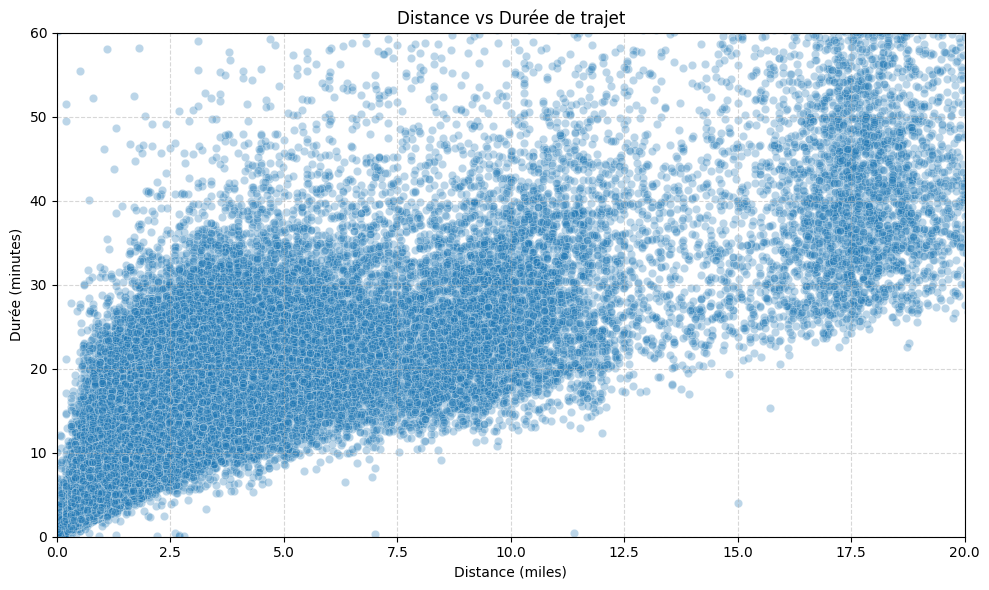

In [27]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=dataset_geo.sample(100000),
    x='trip_distance',
    y='trip_duration_minute',
    alpha=0.3
)
plt.title("Distance vs Durée de trajet")
plt.xlabel("Distance (miles)")
plt.ylabel("Durée (minutes)")
plt.xlim(0, 20)
plt.ylim(0, 60)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [28]:
# Analyse des lignes récurrentes

# Regroupement pickup → dropoff
top_flows = dataset_geo.groupby(['pickup_zone', 'dropoff_zone']).size().reset_index(name='n_trips')

# Top 20 flux
top_flows = top_flows.sort_values(by='n_trips', ascending=False).head(20)
print(top_flows)


                        pickup_zone               dropoff_zone  n_trips
22181         Upper East Side South      Upper East Side North    23433
21971         Upper East Side North      Upper East Side South    20237
21970         Upper East Side North      Upper East Side North    16378
22182         Upper East Side South      Upper East Side South    15609
14795                Midtown Center      Upper East Side South    10701
22118         Upper East Side South             Midtown Center     9362
14794                Midtown Center      Upper East Side North     9142
22557         Upper West Side South      Upper West Side North     8873
12883           Lincoln Square East      Upper West Side South     8560
22491         Upper West Side South        Lincoln Square East     8050
12672               Lenox Hill West      Upper East Side North     7996
17288  Penn Station/Madison Sq West  Times Sq/Theatre District     7928
21893         Upper East Side North            Lenox Hill West  

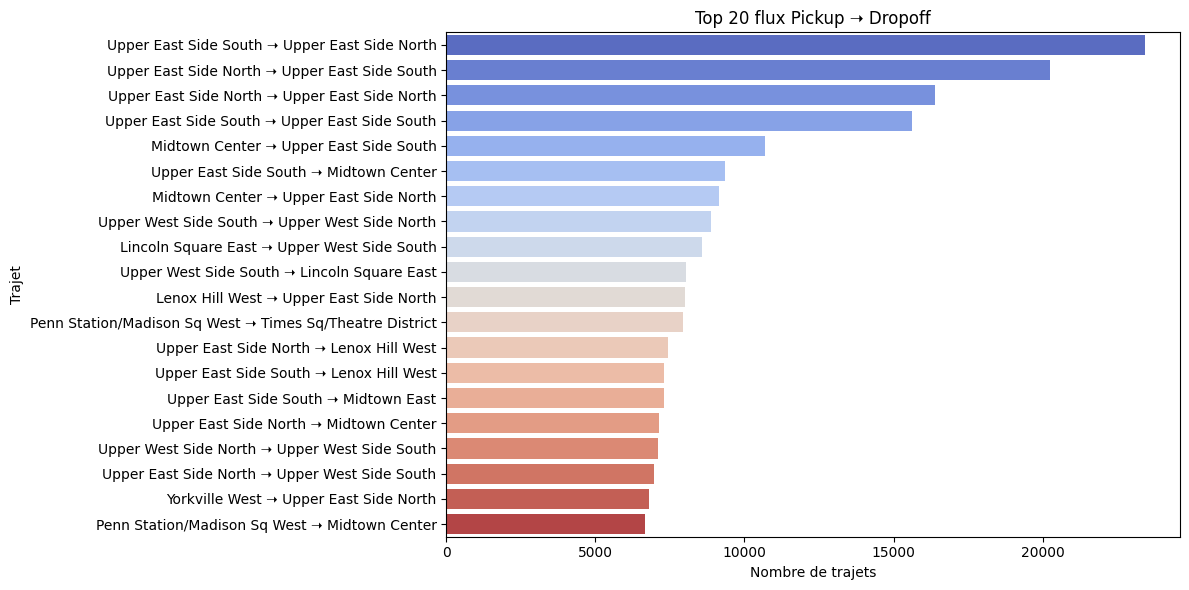

In [29]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=top_flows,
    x='n_trips',
    y=top_flows['pickup_zone'] + " ➝ " + top_flows['dropoff_zone'],
    palette='coolwarm'
)
plt.title("Top 20 flux Pickup ➝ Dropoff")
plt.xlabel("Nombre de trajets")
plt.ylabel("Trajet")
plt.tight_layout()
plt.show()


| Recommandation                                           | Détail                                                                                  |
| -------------------------------------------------------- | --------------------------------------------------------------------------------------- |
| 🔁 Positionner une flotte stable dans Upper East Side    | Demande continue toute la journée pour trajets courts. Rotation rapide.                 |
| 🚦 Adapter la flotte en **Midtown ↔ Upper East Side**    | Très forte demande **en rush hour**. Prévoir un repositionnement intelligent des taxis. |
| 🔄 Suivre les **flux Est-Ouest**                         | Optimisation importante possible selon les congestions.                                 |
| 📍 Créer un algorithme de **repositionnement dynamique** | Se baser sur heure + zone pour dispatcher automatiquement les taxis après une course.   |


**# Analyse de la rentabilité des courses**

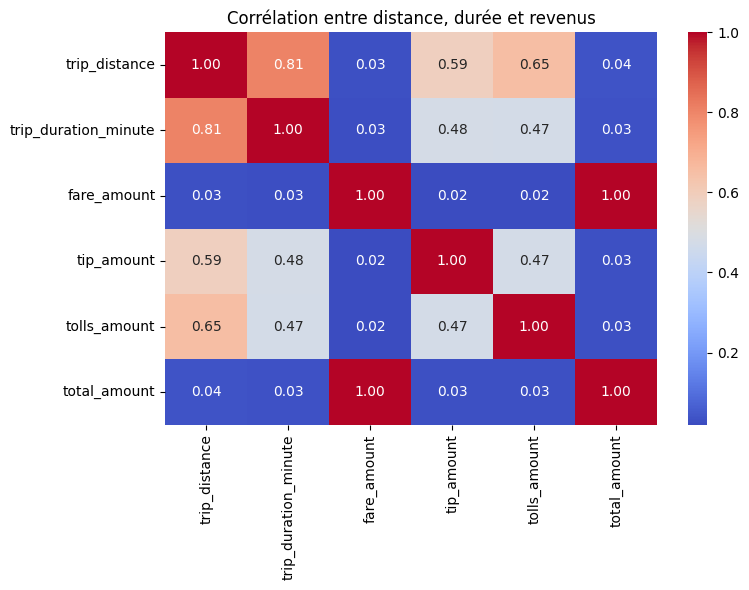

In [30]:
# Variables financières principales
cols_corr = ['trip_distance', 'trip_duration_minute', 'fare_amount', 'tip_amount', 'tolls_amount', 'total_amount']

# Corrélation
corr_matrix = dataset_geo[cols_corr].corr()

# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Corrélation entre distance, durée et revenus')
plt.tight_layout()
plt.show()


***🔹Corrélations entre distance, durée et revenus***
**Distance ↔ Durée** : très forte corrélation (0.81) → logique

**Distance ↔ Tip_amount** : corrélation notable (0.59) → plus c’est long, plus le pourboire augmente

**Tolls ↔ Tip / Distance** : effet modéré

**Total_amount est décorrélé de distance/durée** → 💡 surprenant

***🎯 Interprétation :***

Le revenu total n’est pas principalement fonction de la distance ou durée → il dépend des suppléments fixes, des péages, et surtout du type de paiement.

In [31]:
dataset_geo['revenue_per_mile'] = dataset_geo['total_amount'] / dataset_geo['trip_distance']
dataset_geo['revenue_per_minute'] = dataset_geo['total_amount'] / dataset_geo['trip_duration_minute']


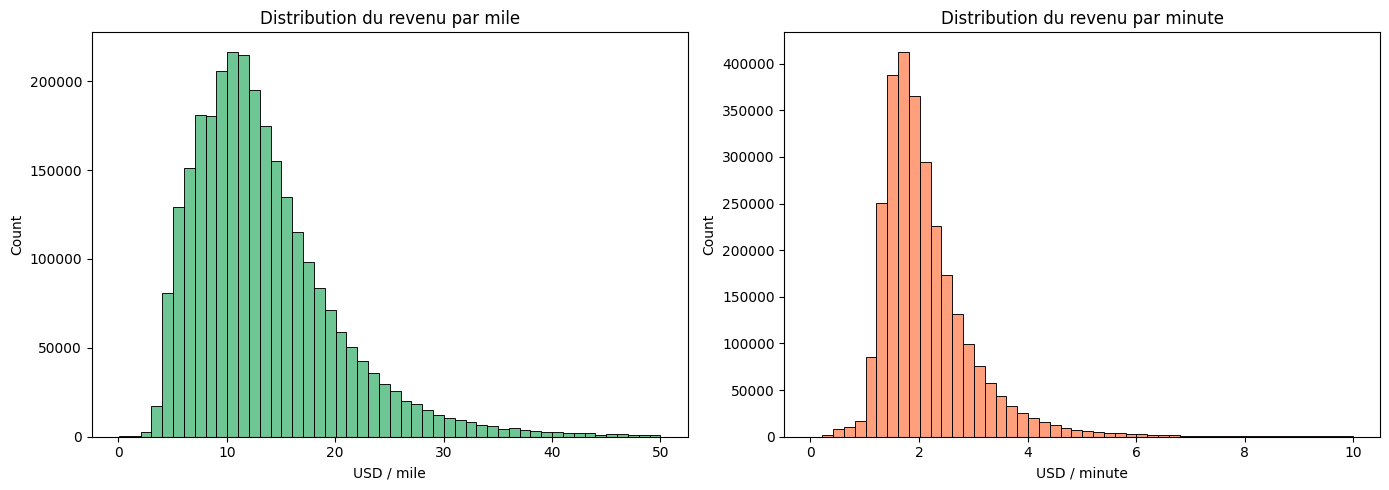

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(14,5))

# Revenue per mile
sns.histplot(dataset_geo[dataset_geo['revenue_per_mile'] < 50]['revenue_per_mile'], bins=50, ax=axes[0], color='mediumseagreen')
axes[0].set_title('Distribution du revenu par mile')
axes[0].set_xlabel('USD / mile')

# Revenue per minute
sns.histplot(dataset_geo[dataset_geo['revenue_per_minute'] < 10]['revenue_per_minute'], bins=50, ax=axes[1], color='coral')
axes[1].set_title('Distribution du revenu par minute')
axes[1].set_xlabel('USD / minute')

plt.tight_layout()
plt.show()


In [33]:
# Moyenne du tip_amount par type de paiement
tips_by_payment = dataset_geo.groupby('payment_type')['tip_amount'].mean().sort_values(ascending=False)
print(tips_by_payment)

"""
-- 1 = Credit card --
-- 2 = Cash --
-- 3 = No charge --
-- 4 = Dispute --
"""


payment_type
1    4.098314
4    0.009841
3    0.003146
2    0.000271
Name: tip_amount, dtype: float64


'\n-- 1 = Credit card --\n-- 2 = Cash --\n-- 3 = No charge --\n-- 4 = Dispute --\n'

***Rentabilité moyenne***
**💵 Revenu par mile** : 8–13 $/mile = très élevé (indique que les trajets courts à fort tarif dominent)

**⏱ Revenu par minute** : 1.8–2.3 $/min = très bon taux horaire

**Cela confirme** : les petits trajets intra-Manhattan sont les plus rentables !

***🎯 Recommandation*** :

Encourager les chauffeurs à se concentrer sur les zones centrales avec rotations fréquentes.
Éviter les longs trajets vers les banlieues à faible retour.

In [34]:
# détection des anomalies 
"""
*store_and_fwd_flag*

This flag indicates whether the trip record was held in vehicle memory before
sending to the vendor, aka “store and forward,” because the vehicle did not
have a connection to the server.
Y = store and forward trip
N = not a store and forward trip

"""

'\n*store_and_fwd_flag*\n\nThis flag indicates whether the trip record was held in vehicle memory before\nsending to the vendor, aka “store and forward,” because the vehicle did not\nhave a connection to the server.\nY = store and forward trip\nN = not a store and forward trip\n\n'

In [ ]:
# Nombre
flag_counts = dataset_geo['store_and_fwd_flag'].value_counts()
print(flag_counts)

# Fréquence 
flag_pct = dataset_geo['store_and_fwd_flag'].value_counts(normalize=True) * 100
print(flag_pct)


store_and_fwd_flag
N    2807445
Y       6824
Name: count, dtype: int64
store_and_fwd_flag
N    99.757521
Y     0.242479
Name: proportion, dtype: float64


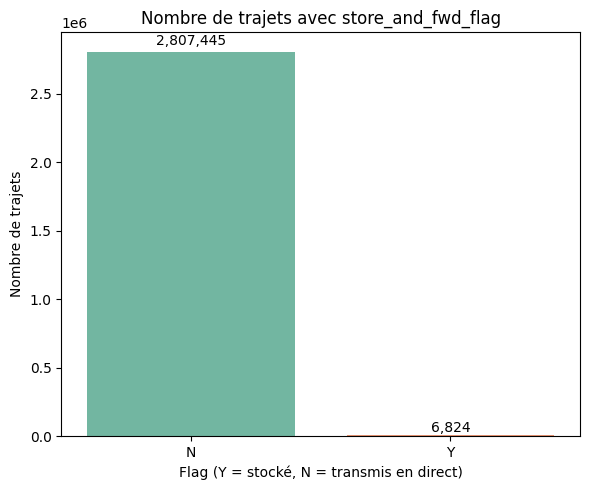

In [36]:
plt.figure(figsize=(6,5))
ax = sns.barplot(x=flag_counts.index, y=flag_counts.values, palette="Set2")
plt.title("Nombre de trajets avec store_and_fwd_flag")
plt.xlabel("Flag (Y = stocké, N = transmis en direct)")
plt.ylabel("Nombre de trajets")
plt.tight_layout()

# ajout des étiquettes sur les barres
for i, value in enumerate(flag_counts.values):
    ax.text(i, value + value*0.01, f'{value:,}', ha='center', va='bottom', fontsize=10)

plt.show()

In [ ]:
# top zones où store_and_fwd_flag = Y
top_store_zones = dataset_geo[dataset_geo['store_and_fwd_flag'] == 'Y']['pickup_zone'].value_counts().head(10)
top_store_zones


pickup_zone
Midtown Center                  417
Upper East Side South           377
Upper East Side North           355
Times Sq/Theatre District       301
Midtown East                    264
Penn Station/Madison Sq West    250
JFK Airport                     243
Lincoln Square East             236
Midtown North                   228
Upper West Side South           227
Name: count, dtype: int64

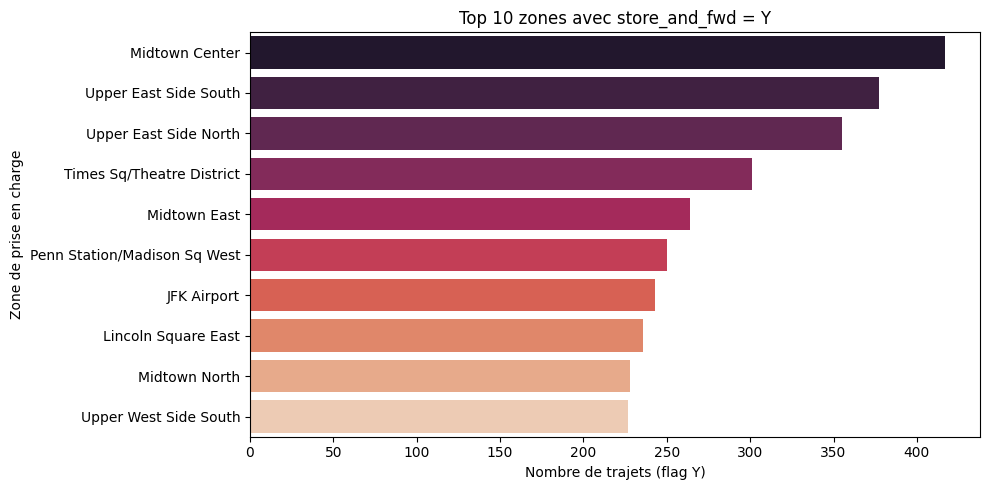

In [38]:
plt.figure(figsize=(10,5))
sns.barplot(y=top_store_zones.index, x=top_store_zones.values, palette="rocket")
plt.title("Top 10 zones avec store_and_fwd = Y")
plt.xlabel("Nombre de trajets (flag Y)")
plt.ylabel("Zone de prise en charge")
plt.tight_layout()
plt.show()

In [ ]:
# moyennes comparées
store_group = dataset_geo.groupby('store_and_fwd_flag')[['trip_distance', 'trip_duration_minute', 'total_amount', 'tip_amount']].mean().round(2)
store_group


,trip_distance,trip_duration_minute,total_amount,tip_amount
store_and_fwd_flag,,,,
N,3.18,14.59,27.68,3.50
Y,2.80,13.81,25.38,3.22


In [40]:
# trajets avec durée négative
anomalie_duree = dataset_geo[dataset_geo['trip_duration_minute'] <= 0]

# trajets avec distance nulle
anomalie_distance = dataset_geo[dataset_geo['trip_distance'] == 0]

print(f"Trajets avec durée <= 0 : {anomalie_duree.shape[0]}")
print(f"Trajets avec distance = 0 : {anomalie_distance.shape[0]}")

# 0 car dataset néttoyé avant


Trajets avec durée <= 0 : 0
Trajets avec distance = 0 : 0


In [41]:
#Export pour Dashboard PowerBI

# Dataset principal
dataset_geo.to_csv("dataset/data_powerbi.csv", index=False)


top_flows.to_csv("dataset/top_flows.csv", index=False)
